In [1]:
import joblib
from tree_utils import *
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler


In [2]:
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl") 
best_tree = joblib.load("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/best_tree.pkl")
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
df

,Unnamed: 0.1,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,74000,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,...,-7.806,0,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,1,74001,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,...,-13.338,0,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,2,74002,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,...,-8.658,0,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,3,74003,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,...,-10.889,0,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,4,74004,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,...,-13.703,1,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,22995,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,...,-5.850,1,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,2996,22996,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,...,-4.465,1,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,2997,22997,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,...,-3.552,0,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,2998,22998,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,...,-1.722,1,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [3]:
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [4]:


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


def pDecisionTree(Xdata, ydata):
    feature_names = Xdata.columns

    # Scale new data
    X_new_scaled = scaler.transform(Xdata)
    X_new = pd.DataFrame(X_new_scaled, columns=feature_names)

    label_encoder = joblib.load("label_encoder.pkl")

    y_true_encoded = label_encoder.transform(ydata)
    class_labels = label_encoder.classes_

    # Predict using the already-trained best_tree
    tree_pred = best_tree.predict(X_new)


    return X_new,tree_pred, y_true_encoded, class_labels  # Return both to allow accuracy calculation


def getAccuracy(y_pred, y_true_encoded, class_labels):
    acc = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_true_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=45, cmap='Blues')
    

def add_encoded_labels_to_df(y_true_encoded, df):
    df_y_encoded = pd.DataFrame({"track_genre_encoded": y_true_encoded})
    df_combined = pd.merge(df, df_y_encoded, left_index=True, right_index=True)
    return df_combined



/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9730


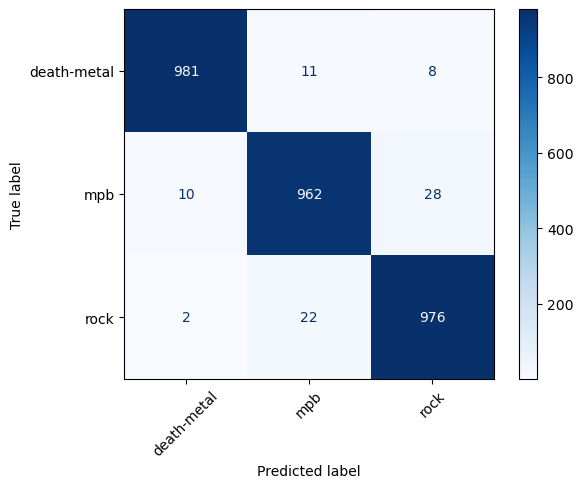

In [8]:
Xs = df.iloc[:, 4:18]
y = df["track_genre"]

t, x, y,z= pDecisionTree(Xs,y)
df_encoded_genr = add_encoded_labels_to_df(y, df)
getAccuracy(x,y,z)

In [9]:
df_with_leaf_nodes =  get_samples_leaf_nodes(best_tree, t)
print(df_with_leaf_nodes)
(df_with_leaf_nodes["leaf_node"] == 210).value_counts()

      sample_index  leaf_node
0                0        210
1                1        210
2                2        163
3                3        158
4                4        158
...            ...        ...
2995          2995        125
2996          2996         21
2997          2997        125
2998          2998        209
2999          2999        125

[3000 rows x 2 columns]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


leaf_node
False    2833
True      167
Name: count, dtype: int64

In [15]:
leaf_node_groups = df_with_leaf_nodes.groupby('leaf_node').agg({"sample_index": list}).reset_index()
leaf_node_groups

,leaf_node,sample_index
0,4,"[1156, 1396, 1520, 1933]"
1,6,"[2043, 2046, 2047, 2076]"
2,7,"[1217, 1227, 1228, 1230, 1241, 1242, 1244, 136..."
3,10,"[1790, 1819, 1821, 1822, 1824, 1826, 1859, 187..."
4,11,"[2030, 2033, 2034, 2040, 2098, 2133]"
...,...,...
101,205,"[105, 606, 615]"
102,207,"[551, 2199, 2472, 2599]"
103,208,[103]
104,209,"[2093, 2095, 2119, 2121, 2130, 2144, 2146, 219..."


In [10]:
knn = joblib.load("knn_model.pkl")

leaf_node_groups = df_with_leaf_nodes.groupby('leaf_node')['sample_index'].apply(list).to_dict()
print(leaf_node_groups)
for index_s in leaf_node_groups["sample_index"]:
    node = df_with_leaf_nodes.iloc[index_s,1]
    data = leaf_node_groups[node]
    recommendations_subset = pd.DataFrame()
    for index_n in data:
        recommendations_subset df_encoded_genr.iloc[index_n]
    
leaf_node_groups

{4: [1156, 1396, 1520, 1933], 6: [2043, 2046, 2047, 2076], 7: [1217, 1227, 1228, 1230, 1241, 1242, 1244, 1360, 1376, 1473, 1830, 1877, 1889, 2037], 10: [1790, 1819, 1821, 1822, 1824, 1826, 1859, 1871, 1896, 1981, 1983, 2398], 11: [2030, 2033, 2034, 2040, 2098, 2133], 15: [2027], 16: [1114, 1155, 1169, 1236, 1467, 1522, 1619, 1628, 1689, 1699, 1732, 1734, 1735, 1776, 1777, 1788, 1810, 1891, 1892, 1893, 1895, 1897], 17: [1028, 1115, 1117, 1120, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1167, 1168, 1170, 1171, 1173, 1174, 1175, 1176, 1177, 1178, 1181, 1182, 1183, 1207, 1208, 1209, 1211, 1212, 1213, 1214, 1215, 1219, 1232, 1233, 1234, 1327, 1337, 1340, 1366, 1380, 1390, 1391, 1392, 1398, 1412, 1420, 1421, 1429, 1435, 1480, 1541, 1547, 1621, 1623, 1811, 1817, 1818, 1828, 1849, 1878, 1894, 1923, 1980, 2044, 2091, 2347], 19: [1130, 2270, 2299], 21: [1741, 2085, 2297, 2996], 22: [1223, 1698, 1742, 1925, 1932, 2725], 30: [23, 1624, 1631, 1634, 1642, 1645, 1675, 1681, 1687, 1720, 1729, 173

{4: [1156, 1396, 1520, 1933],
 6: [2043, 2046, 2047, 2076],
 7: [1217,
  1227,
  1228,
  1230,
  1241,
  1242,
  1244,
  1360,
  1376,
  1473,
  1830,
  1877,
  1889,
  2037],
 10: [1790, 1819, 1821, 1822, 1824, 1826, 1859, 1871, 1896, 1981, 1983, 2398],
 11: [2030, 2033, 2034, 2040, 2098, 2133],
 15: [2027],
 16: [1114,
  1155,
  1169,
  1236,
  1467,
  1522,
  1619,
  1628,
  1689,
  1699,
  1732,
  1734,
  1735,
  1776,
  1777,
  1788,
  1810,
  1891,
  1892,
  1893,
  1895,
  1897],
 17: [1028,
  1115,
  1117,
  1120,
  1157,
  1158,
  1159,
  1160,
  1161,
  1162,
  1163,
  1164,
  1167,
  1168,
  1170,
  1171,
  1173,
  1174,
  1175,
  1176,
  1177,
  1178,
  1181,
  1182,
  1183,
  1207,
  1208,
  1209,
  1211,
  1212,
  1213,
  1214,
  1215,
  1219,
  1232,
  1233,
  1234,
  1327,
  1337,
  1340,
  1366,
  1380,
  1390,
  1391,
  1392,
  1398,
  1412,
  1420,
  1421,
  1429,
  1435,
  1480,
  1541,
  1547,
  1621,
  1623,
  1811,
  1817,
  1818,
  1828,
  1849,
  1878,
  1894,


167